# KC House Price Prediction

## Importing libraries

In [1]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load data 

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1897,6381500505,20150402T000000,400000.0,3,1.00,1250,7157,1.0,0,0,...,7,1250,0,1944,2010,98125,47.7323,-122.304,1300,6796
7451,7000100635,20140715T000000,600000.0,3,1.00,940,19000,1.0,0,0,...,6,940,0,1945,0,98004,47.5828,-122.190,2280,19000
3878,4364700600,20141216T000000,216000.0,3,1.00,1010,7920,1.0,0,0,...,6,1010,0,1925,0,98126,47.5249,-122.370,1520,7560
18427,4139900120,20140605T000000,1415000.0,4,5.25,4670,43950,2.0,0,0,...,12,4670,0,1989,0,98006,47.5456,-122.126,4900,35000
10334,3709500140,20140623T000000,459950.0,4,2.50,2000,6107,2.0,0,0,...,8,2000,0,2003,0,98011,47.7557,-122.221,2040,6520
11956,920069053,20140917T000000,201000.0,3,1.00,960,15273,1.0,0,0,...,7,960,0,1963,0,98022,47.2380,-122.039,1930,51400
16794,1473120190,20140530T000000,386000.0,3,2.00,2120,7560,1.0,0,0,...,9,2120,0,1991,0,98058,47.4350,-122.160,2660,7700
12715,5014000085,20140623T000000,425000.0,2,1.00,880,6413,1.0,0,0,...,7,880,0,1950,0,98116,47.5730,-122.395,1360,6413
10498,8651611230,20140711T000000,780000.0,3,3.50,3190,6776,2.0,0,0,...,10,3190,0,1998,0,98074,47.6348,-122.064,3230,7189
3427,7732400490,20141105T000000,732350.0,4,2.50,2270,7665,2.0,0,0,...,9,2270,0,1986,0,98052,47.6612,-122.148,2450,8706


In [4]:
df.shape

(21613, 21)

## Drop some columns

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df = df.drop(['id', 'date','zipcode', 'lat', 'long'], axis=1)

In [7]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


## Data Cleaning & Preparation

### Categorize 'yr_renovated' 

In [8]:
df.loc[df['yr_renovated'] > 1, 'yr_renovated'] = 1

In [9]:
df['yr_renovated'].head()

0    0
1    1
2    0
3    0
4    0
Name: yr_renovated, dtype: int64

### Check for Nulls

In [10]:
df.isnull().values.any()

False

In [11]:
df.shape

(21613, 16)

### Check Data Types

In [12]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Convert to Categories 

In [13]:
col_names = ['waterfront', 'view', 'yr_renovated']

In [14]:
for col in col_names:
    df[col] = df[col].astype('category', copy= False)

In [15]:
df.dtypes

price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated     category
sqft_living15       int64
sqft_lot15          int64
dtype: object

## Save data cleaned

In [16]:
df.to_csv('../data/kc_house_price_data_cleaned.csv', index ='false', header = True)

## Visualize some data

### Bedrooms vs Bathrooms

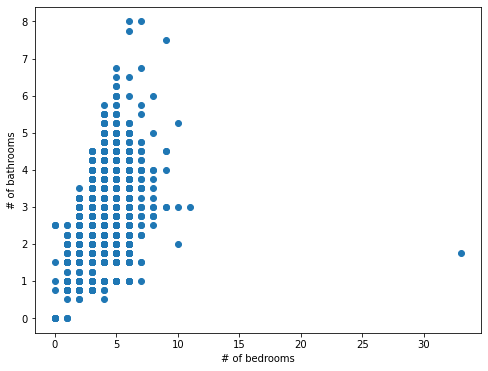

In [17]:
fig,ax = plt.subplots(figsize=(8,6))
plt.scatter(df['bedrooms'], df['bathrooms'])
plt.xlabel('# of bedrooms')
plt.ylabel('# of bathrooms')
plt.show()

### SquareFootage vs Price

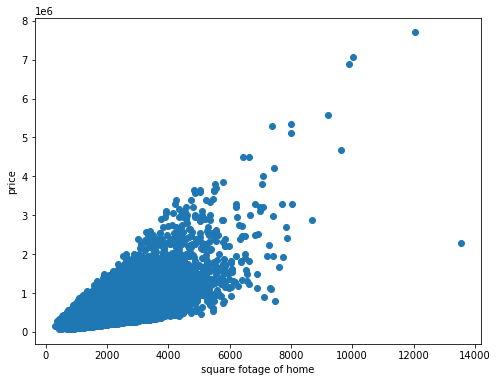

In [18]:
fig,ax = plt.subplots(figsize=(8,6))
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('square fotage of home')
plt.ylabel('price')
plt.show()

### Grade vs Price

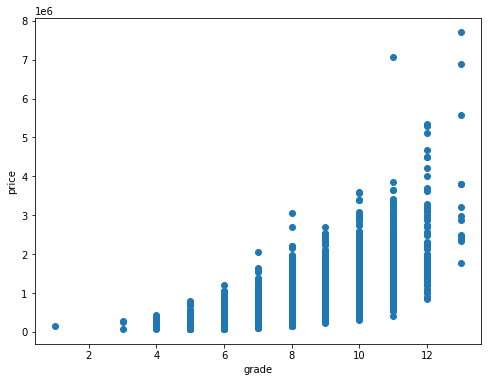

In [19]:
fig,ax = plt.subplots(figsize=(8,6))
plt.scatter(df['grade'], df['price'])
plt.xlabel('grade')
plt.ylabel('price')
plt.show()

## Check correlation

In [20]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.036362,0.667434,0.605567,0.323816,0.054012,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,0.028472,0.356967,0.477600,0.303093,0.154178,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,-0.124982,0.664983,0.685342,0.283770,0.506019,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,-0.058753,0.762704,0.876597,0.435043,0.318049,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,-0.008958,0.113621,0.183512,0.015286,0.053080,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.279885,-0.011269
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,-0.144674,1.000000,0.755923,0.168392,0.446963,0.713202,0.119248
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.731870,0.194050
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,-0.245705,0.174105,0.168392,-0.051943,1.000000,-0.133124,0.200355,0.017276


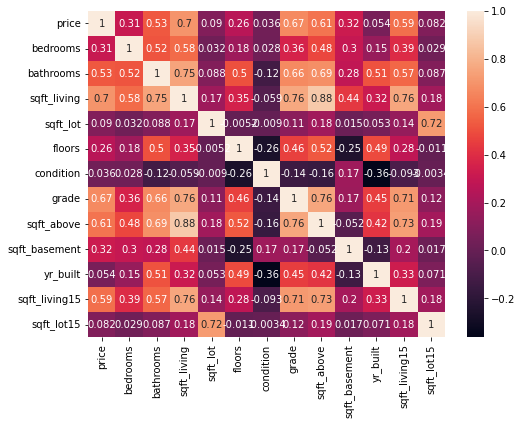

In [21]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Machine Learning 

### Define Output and Inputs

In [22]:
y = df['price']
X = df.drop('price', axis = 1)

### Split dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 101)

In [24]:
X_train.shape, X_test.shape

((12967, 15), (8646, 15))

In [25]:
y_train.shape, y_test.shape

((12967,), (8646,))

### Instantiate Linear Regression Model

In [26]:
reg = LinearRegression()
reg_model = reg.fit(X_train, y_train)

### Score

In [27]:
reg_model.score(X_test, y_test)

0.6614237738473162

### Cross Validation 

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [30]:
scores = cross_val_score(reg, X,y, cv=5, scoring='r2')

#### Make five trained models

In [31]:
scores

array([0.65601448, 0.65068776, 0.64352625, 0.65810485, 0.62574569])